In [17]:
import gymnasium as gym
import dsrl.offline_safety_gymnasium
import numpy as np

In [19]:
from dsrl.offline_env import filter_trajectory
from utils import dsrl_utils
import matplotlib.pyplot as plt

In [20]:
env = gym.make("OfflinePointGoal1Gymnasium")
dataset = env.get_dataset()

/home/returaj/miniconda3/envs/dsrl/lib/python3.10/site-packages/gymnasium/envs/registration.py:531: UserWarning: WARN: Using the latest versioned environment `OfflinePointGoal1Gymnasium-v0` instead of the unversioned environment `OfflinePointGoal1Gymnasium`.
  logger.warn(


Loading dataset from /home/returaj/.dsrl/datasets/SafetyPointGoal1Gymnasium-v0-100-2022.hdf5


load datafile: 100%|██████████| 7/7 [00:07<00:00,  1.08s/it]


In [30]:
rew_ret, cost_ret, start_idx, end_idx = dsrl_utils.get_trajectory_info(dataset)

Total number of data points: 2022000


In [31]:
keys = ['observations', 'next_observations', 'actions', 'rewards', 'costs', 'terminals', 'timeouts']
traj = []
for i in range(len(rew_ret)):
    start = start_idx[i]
    end = end_idx[i] + 1
    one_traj = {k: dataset[k][start:end] for k in keys}
    traj.append(one_traj)
print(f"Total number of trajectories: {len(traj)}")

Total number of trajectories: 2022


Text(0, 0.5, 'Rewards')

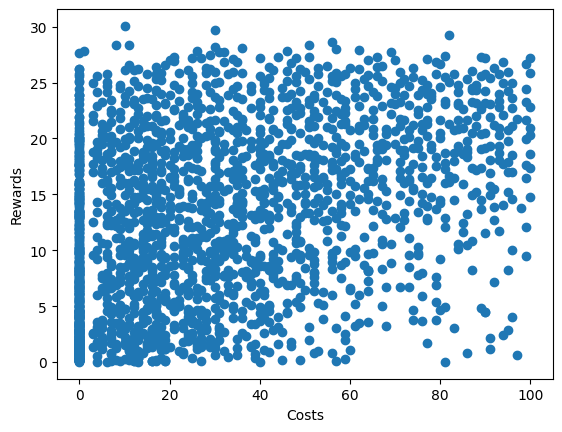

In [32]:
plt.scatter(cost_ret, rew_ret)
plt.xlabel("Costs")
plt.ylabel("Rewards")

In [36]:
new_cost_ret, new_rew_ret, new_traj, indices = filter_trajectory(
    cost_ret,
    rew_ret,
    traj,
    cost_min=60.0,
    rew_min=15.0,
    cost_bins=10,
    rew_bins=8,
    max_num_per_bin=16,
    min_num_per_bin=2
)
len(new_cost_ret)


205

Text(0, 0.5, 'Rewards')

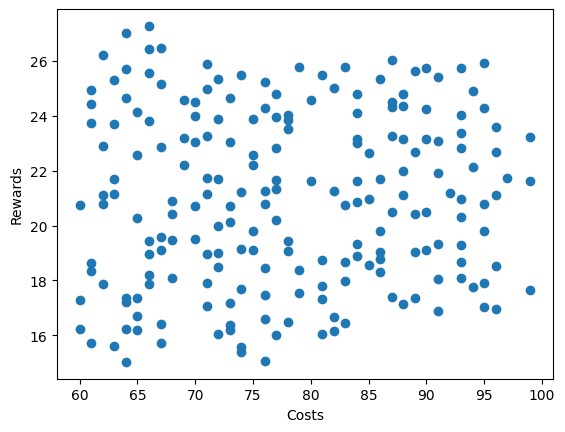

In [37]:
plt.scatter(new_cost_ret, new_rew_ret)
plt.xlabel("Costs")
plt.ylabel("Rewards")

294